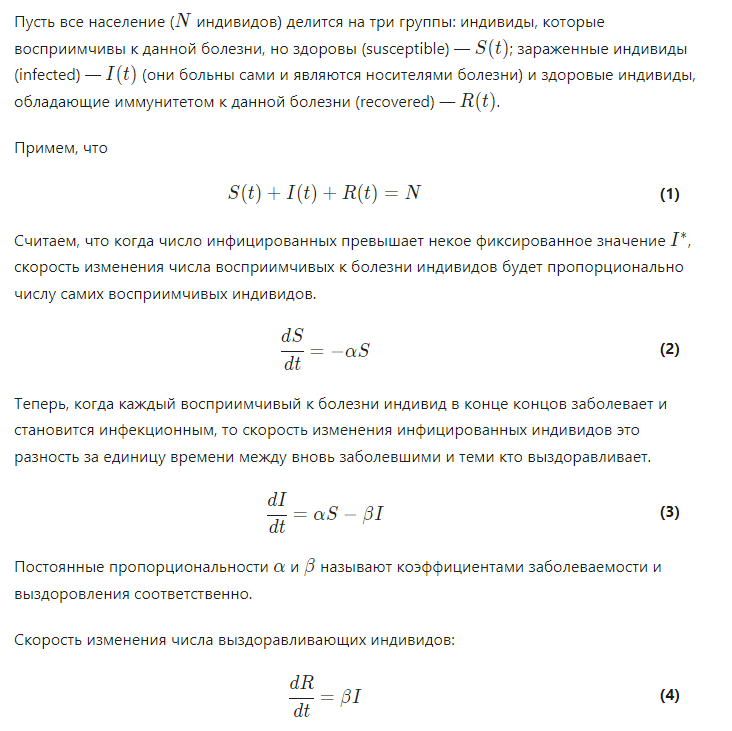

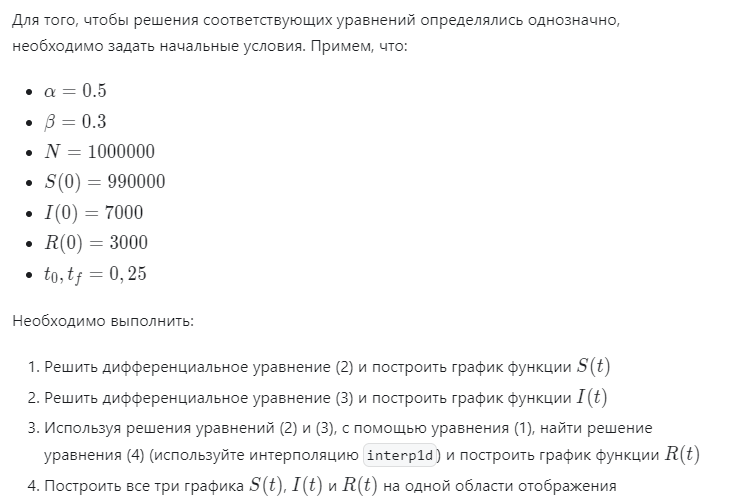

In [1]:
from scipy.integrate import solve_ivp, odeint
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a = 0.5
b = 0.3 
N = 1000000 
S = 990000 
I = 7000
R = 3000 
t0 = 0
tf = 25

In [3]:
t = np.linspace(t0, tf, 100)

Согласно формуле (2) создаем функцию:

In [4]:
def dSdt(t, y):
    return -a * y

In [5]:
result1 = solve_ivp(dSdt, [t0, tf], [S], dense_output=True)

In [6]:
t_dSdt, y_dSdt = result1.t, result1.y[0]

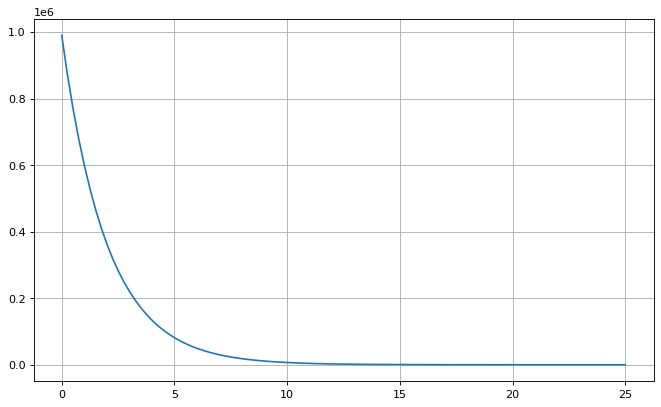

In [25]:
st = interpolate.interp1d(t_dSdt, y_dSdt, kind='cubic')

plt.figure(figsize = (10, 6), dpi = 80)
plt.grid()
plt.plot(t, st(t))

Согласно формуле (3) создаем функцию:

In [9]:
def dIdt(t, y):
    return a * st(t) - b * y

In [16]:
result2 = solve_ivp(dIdt, [t0, tf], [I], dense_output=True)

In [17]:
t_dIdt, y_dIdt = result2.t, result1.y[0]

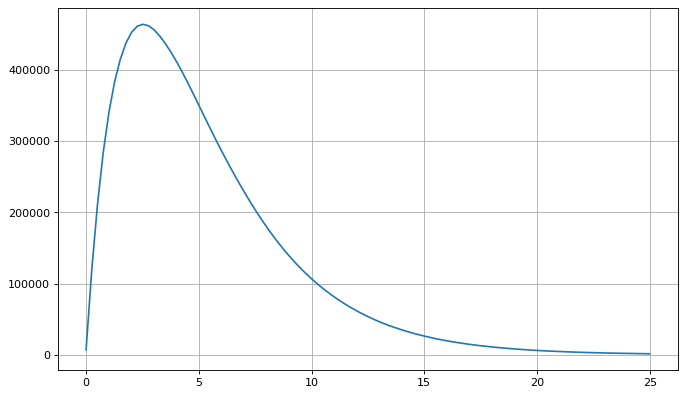

In [26]:
it = interpolate.interp1d(t_dIdt, y_dIdt, kind='cubic')

plt.figure(figsize = (10, 6), dpi = 80)
plt.grid()
plt.plot(t, it(t))

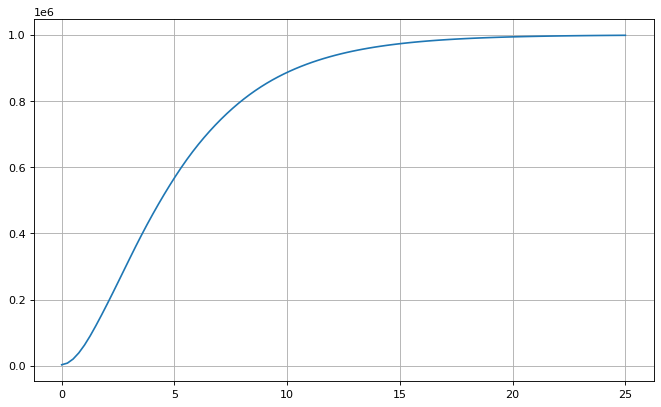

In [28]:
y3 = N - st(t) - it(t)

plt.figure(figsize = (10, 6), dpi = 80)
plt.grid()
plt.plot(t, y3)

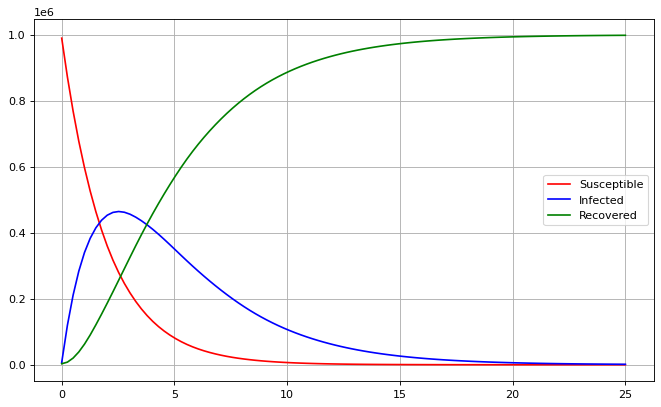

In [32]:
plt.figure(figsize = (10, 6), dpi = 80)
plt.grid()
plt.plot(t, st(t), color='red', label='Susceptible')
plt.plot(t, it(t), color='blue', label='Infected')
plt.plot( t, y3, color='green', label='Recovered')
plt.legend()
plt.show()